# ***TASK 4***

# ***The Data***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Data Loading**

In [ ]:
# Load the dataset
dataset = pd.read_csv('emails.csv')
dataset.shape

(5572, 3)

In [ ]:
# Show dataset first 5 records
dataset.head()

,v1,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
# Show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   text    5572 non-null   object
 2   spam    5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [ ]:
# Show dataset statistics
dataset.describe()

,spam
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Data Visualization**

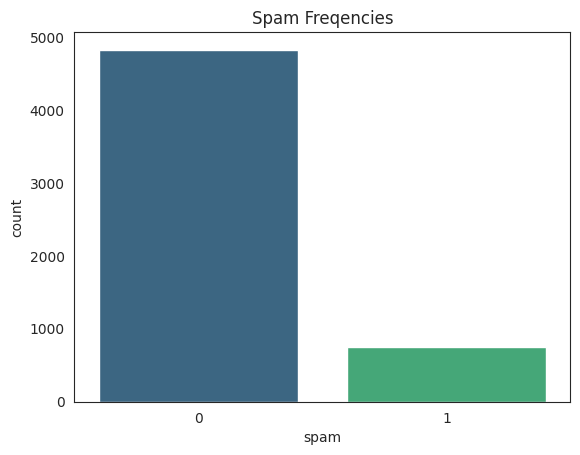

In [ ]:
#Visaulizing Spam Freqencies
sns.countplot(x='spam', data=dataset, palette='viridis')
plt.title("Spam Freqencies")
plt.show()

**Data Cleaning**

In [ ]:
# Check for missing data for each column
dataset.isnull().sum()

v1      0
text    0
spam    0
dtype: int64

In [ ]:
# Check for duplicates and remove them
dataset.drop_duplicates(inplace=True)

In [ ]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [ ]:
# Fit the CountVectorizer to data
#CountVectorizer is a class in scikit-learn that transforms a collection of text documents into a numerical matrix of word or token counts.
message = CountVectorizer(analyzer=process).fit_transform(dataset['text'])

**Data Splitting**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(message, dataset['spam'], test_size=0.20, random_state=0)

# ***The Model***

In [ ]:
# Model creation
model = MultinomialNB()

In [ ]:
# Model training
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Model predictions on test set
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

95.55125725338492

In [ ]:
# Model Evaluation | Classification report
print('Classification Report:\n', classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       885
           1       0.80      0.93      0.86       149

    accuracy                           0.96      1034
   macro avg       0.89      0.94      0.92      1034
weighted avg       0.96      0.96      0.96      1034



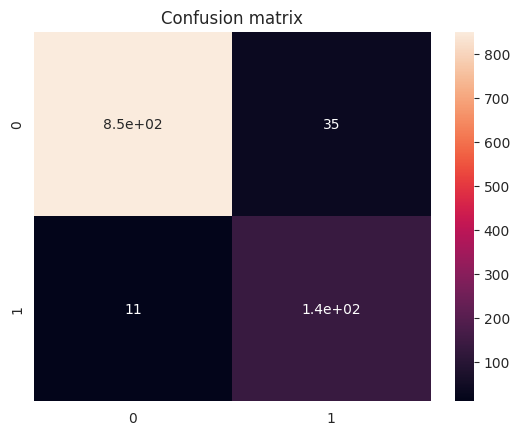

In [ ]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()